# Dependencies

In [246]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Data Loading

In [216]:
def txt_to_pd(file_path):
    """
    Load data from a .txt file and convert into a pandas DataFrame
    Args: 
        file_path (string): Path location of the file to be converted
    Returns:
        df (DataFrame): converted dataframe with index set to "Unit Number"
    """
    
    delimiter = " "

    df = pd.read_csv(file_path, 
               delimiter=delimiter, 
               header=None,
               encoding='utf-8')
    df = df.dropna(axis=1)
    df.columns = ["Unit Number", "Time, in cycles", "Operational Setting 1", "Operational Setting 2", "Operational Setting 3", "Sensor Measurement 1",
              "Sensor Measurement 2", "Sensor Measurement 3", "Sensor Measurement 4", "Sensor Measurement 5", "Sensor Measurement 6", "Sensor Measurement 7", 
              "Sensor Measurement 8", "Sensor Measurement 9", "Sensor Measurement 10", "Sensor Measurement 11", "Sensor Measurement 12", "Sensor Measurement 13", 
              "Sensor Measurement 14", "Sensor Measurement 15", "Sensor Measurement 16", "Sensor Measurement 17", "Sensor Measurement 18", "Sensor Measurement 19", 
              "Sensor Measurement 20", "Sensor Measurement 21"]
    df = df.set_index("Unit Number")
    return df

In [217]:
# Load training and test data
train = txt_to_pd("data/Challenge_Data/train.txt")
test = txt_to_pd("data/Challenge_Data/test.txt")

In [218]:
train.head()

Time, in cycles  Operational Setting 1  Operational Setting 2  \
Unit Number                                                                  
1                          1                10.0047                 0.2501   
1                          2                 0.0015                 0.0003   
1                          3                34.9986                 0.8401   
1                          4                20.0031                 0.7005   
1                          5                42.0041                 0.8405   

             Operational Setting 3  Sensor Measurement 1  \
Unit Number                                                
1                             20.0                489.05   
1                            100.0                518.67   
1                             60.0                449.44   
1                              0.0                491.19   
1                             40.0                445.00   

             Sensor Measurement 2  Sensor Measurement 3  Sensor Measurement 4  \
Unit Number                                                                     
1                          604.13               1499.45               1309.95   
1                          642.13               1584.55               1403.96   
1                          555.42               1368.17               1122.49   
1                          607.03               1488.44               1249.18   
1                          549.52               1354.48               1124.32   

             Sensor Measurement 5  Sensor Measurement 6  ...  \
Unit Number                                              ...   
1                           10.52                 15.49  ...   
1                           14.62                 21.61  ...   
1                            5.48                  8.00  ...   
1                            9.35                 13.65  ...   
1                            3.91                  5.71  ...   

             Sensor Measurement 12  Sensor Measurement 13  \
Unit Number                                                 
1                           372.15                2388.13   
1                           521.81                2388.15   
1                           183.26                2387.95   
1                           314.84                2388.07   
1                           130.44                2387.89   

             Sensor Measurement 14  Sensor Measurement 15  \
Unit Number                                                 
1                          8120.83                 8.6216   
1                          8132.87                 8.3907   
1                          8063.84                 9.3557   
1                          8052.30                 9.2231   
1                          8083.67                 9.2986   

             Sensor Measurement 16  Sensor Measurement 17  \
Unit Number                                                 
1                             0.03                    368   
1                             0.03                    391   
1                             0.02                    334   
1                             0.02                    364   
1                             0.02                    330   

             Sensor Measurement 18  Sensor Measurement 19  \
Unit Number                                                 
1                             2319                  100.0   
1                             2388                  100.0   
1                             2223                  100.0   
1                             2324                  100.0   
1                             2212                  100.0   

             Sensor Measurement 20  Sensor Measurement 21  
Unit Number                                                
1                            28.58                17.1735  
1                            38.99                23.3619  
1                            14.83                 8.8555  
1               

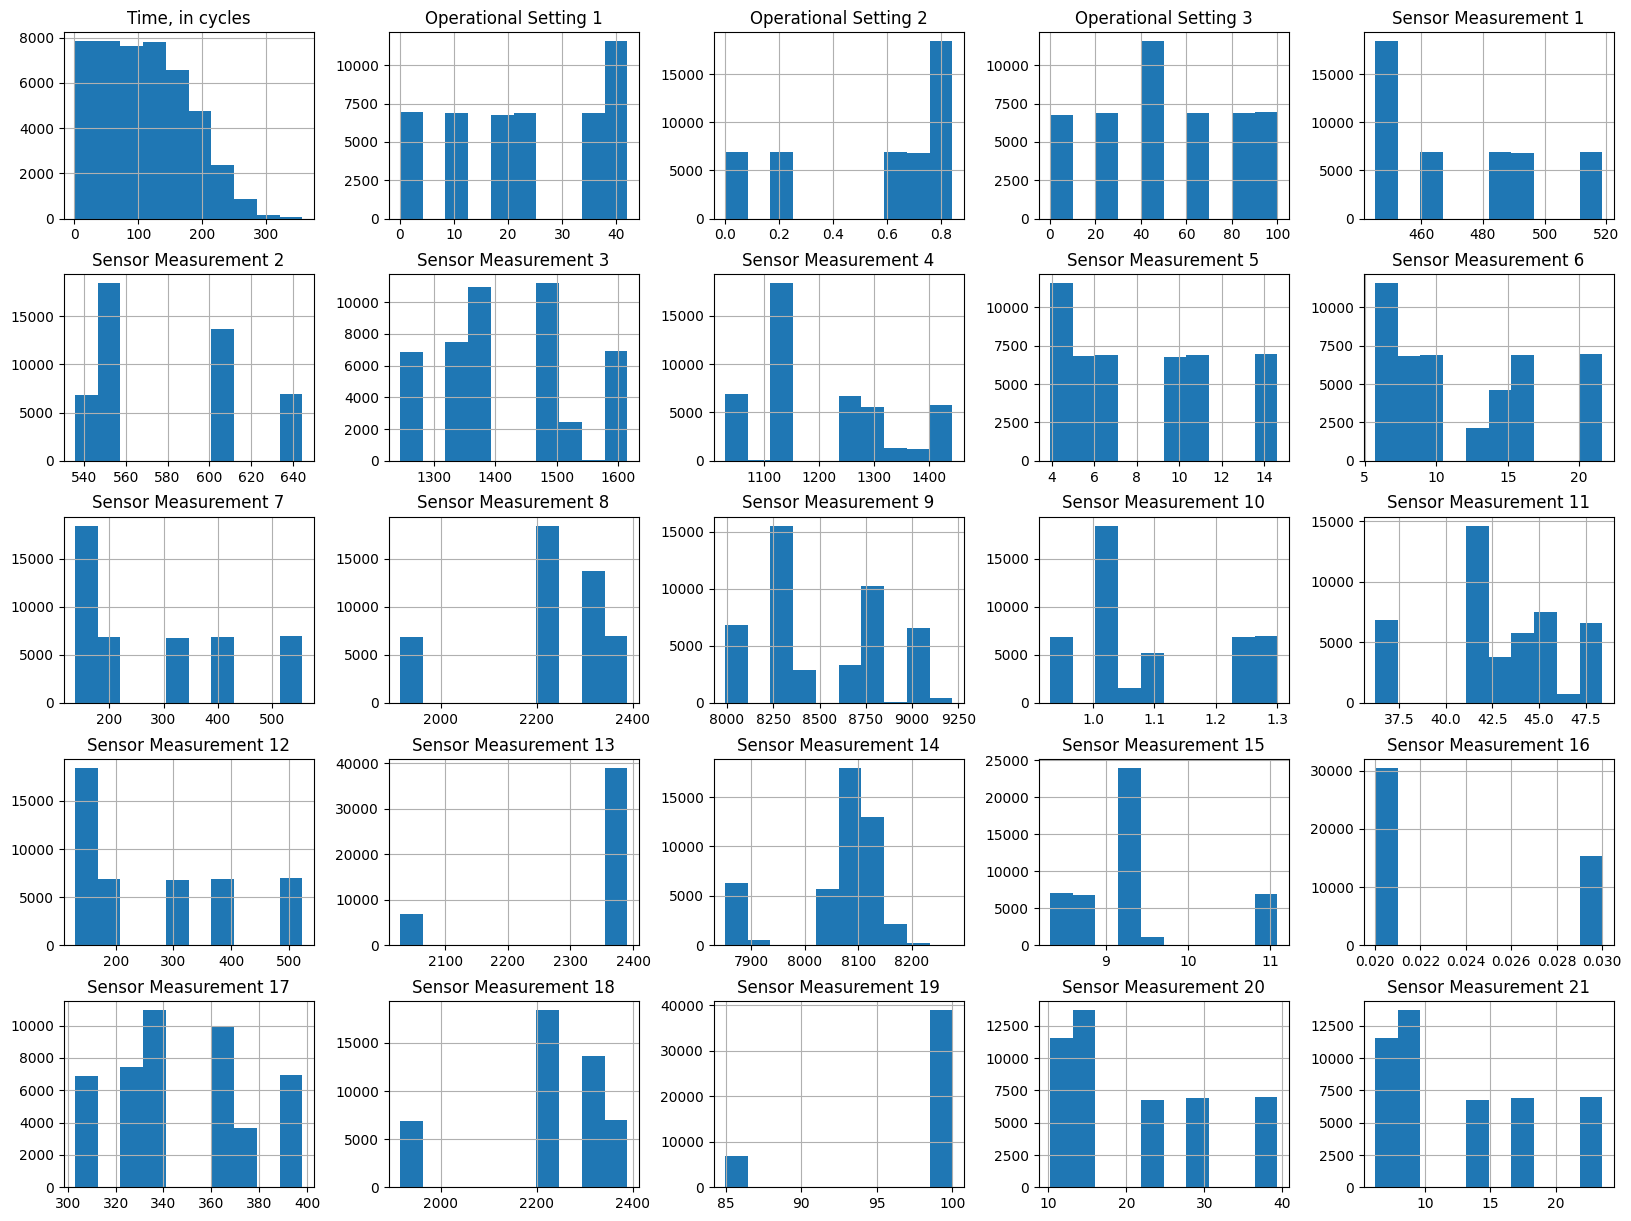

In [219]:
train.hist(bins=10, figsize=(20,15))
plt.show()

In [220]:
test.head()

Time, in cycles  Operational Setting 1  Operational Setting 2  \
Unit Number                                                                  
1                          1                 0.0016                 0.0002   
1                          2                24.9993                 0.6215   
1                          3                 0.0004                 0.0000   
1                          4                10.0034                 0.2500   
1                          5                 0.0024                 0.0011   

             Operational Setting 3  Sensor Measurement 1  \
Unit Number                                                
1                            100.0                518.67   
1                             80.0                462.54   
1                            100.0                518.67   
1                             20.0                489.05   
1                            100.0                518.67   

             Sensor Measurement 2  Sensor Measurement 3  Sensor Measurement 4  \
Unit Number                                                                     
1                          642.88               1587.21               1412.44   
1                          536.45               1262.64               1055.44   
1                          642.65               1589.75               1409.54   
1                          604.44               1499.93               1315.34   
1                          642.74               1585.47               1408.12   

             Sensor Measurement 5  Sensor Measurement 6  ...  \
Unit Number                                              ...   
1                           14.62                 21.61  ...   
1                            7.05                  9.02  ...   
1                           14.62                 21.61  ...   
1                           10.52                 15.49  ...   
1                           14.62                 21.61  ...   

             Sensor Measurement 12  Sensor Measurement 13  \
Unit Number                                                 
1                           521.44                2388.10   
1                           164.32                2027.95   
1                           521.15                2388.19   
1                           371.42                2388.21   
1                           520.86                2388.13   

             Sensor Measurement 14  Sensor Measurement 15  \
Unit Number                                                 
1                          8124.04                 8.4363   
1                          7865.20                10.8935   
1                          8121.12                 8.4620   
1                          8123.53                 8.6815   
1                          8118.30                 8.4617   

             Sensor Measurement 16  Sensor Measurement 17  \
Unit Number                                                 
1                             0.03                    393   
1                             0.02                    308   
1                             0.03                    393   
1                             0.03                    369   
1                             0.03                    392   

             Sensor Measurement 18  Sensor Measurement 19  \
Unit Number                                                 
1                             2388                 100.00   
1                             1915                  84.93   
1                             2388                 100.00   
1                             2319                 100.00   
1                             2388                 100.00   

             Sensor Measurement 20  Sensor Measurement 21  
Unit Number                                                
1                            38.97                23.3029  
1                            14.29                 8.6686  
1                            38.91                23.2693  
1               

# Data Exploration and Pre-processing

## Data Exploration

In [221]:
# Get Actual Remaining Life
unique_list = train.index.unique().tolist()
len(unique_list)
for i in range(len(unique_list)):
    train.loc[i+1, 'Cycle Max'] = train.loc[i+1]['Time, in cycles'].max()
train['Remaining Life'] = train['Time, in cycles'] - train['Cycle Max']

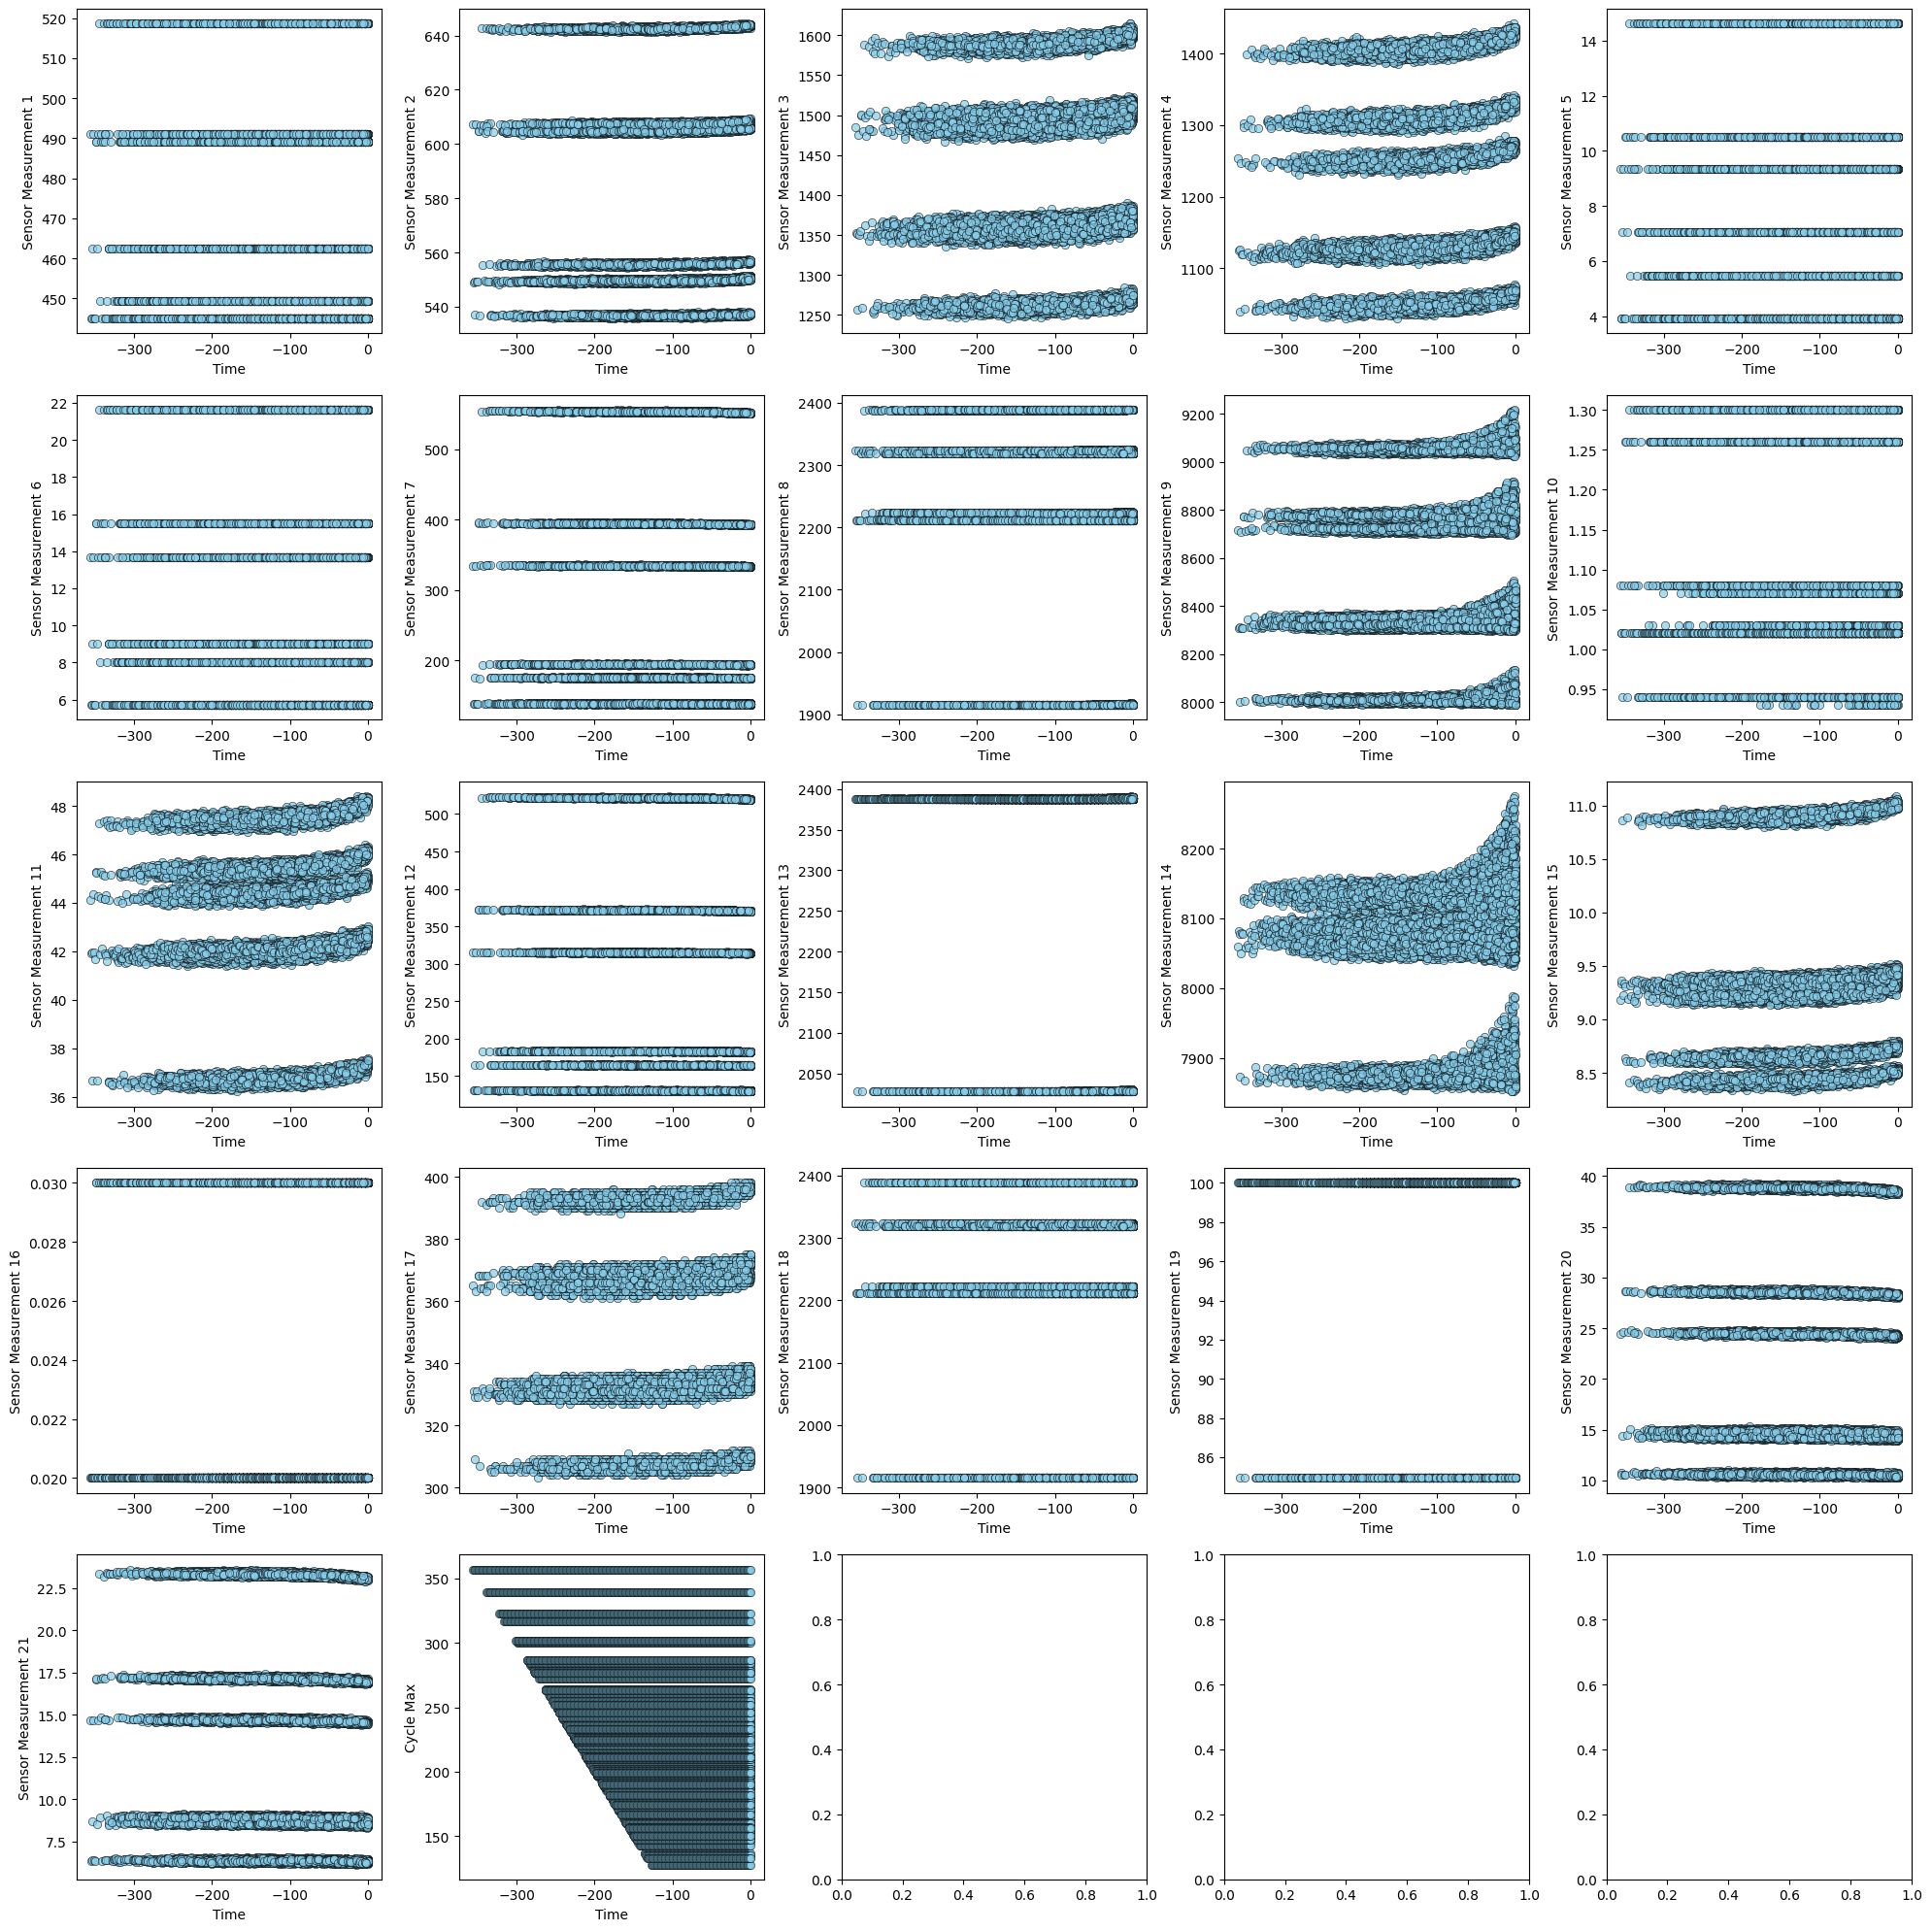

In [222]:
# Plot Remaining Life vs Sensor Measurement of all units and all clusters
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(20, 20)) 

for i in range(len(train.columns)-5):
    # Scatter plot on the ith subplot on cluster 0
    axs[i//5, i-(i//5)*5].scatter(train['Remaining Life'], train[train.columns[i+4]], 
                   color='skyblue', alpha=0.7, edgecolors='black', linewidths=0.5)
    axs[i//5, i-(i//5)*5].set_xlabel('Time')
    axs[i//5, i-(i//5)*5].set_ylabel(train.columns[i+4])

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

In [223]:
# Get Operating Clusters using unsupervised learning (K-means Clustering)
# Calculate for silhoutte score to determine optimal K-means clustering
# Higher silhouette score = better clustering
scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(op_data)
    score = silhouette_score(op_data, labels)
    print("cluster " + str(k) + " - " + str(score))
    scores.append(score)

cluster 2 - 0.5777667217847624
cluster 3 - 0.6646589484162314
cluster 4 - 0.7882728525424852
cluster 5 - 0.9194220366343638
cluster 6 - 0.9998558910028272
cluster 7 - 0.9363615604357539
cluster 8 - 0.8717377468079507
cluster 9 - 0.7624427897550593


[[1.51675295e-03 4.97670406e-04 1.00000000e+02]
 [3.50030533e+01 8.40489284e-01 6.00000000e+01]
 [1.00029627e+01 2.50502528e-01 2.00000000e+01]
 [4.20030440e+01 8.40510423e-01 4.00000000e+01]
 [2.50030126e+01 6.20516407e-01 8.00000000e+01]
 [2.00029465e+01 7.00497164e-01 8.73967565e-13]]


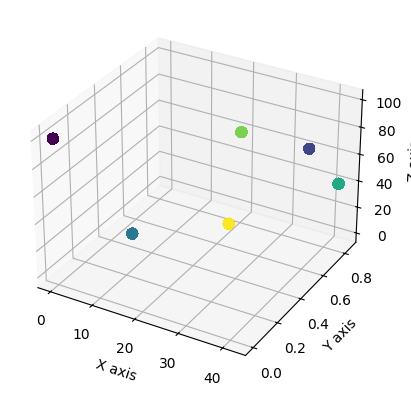

In [224]:
# Create and fit K-Means model using the optimal cluster number (k=6)
kmeans = KMeans(n_clusters=6, random_state=42)
labels = kmeans.fit_predict(op_data)

# Get cluster centers
centers = kmeans.cluster_centers_
print(centers)

# Plot k-clusters 
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Create 3D scatter plot
ax.scatter(x, y, z, c=labels, cmap='viridis', s=50)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

In [225]:
train['cluster'] = labels

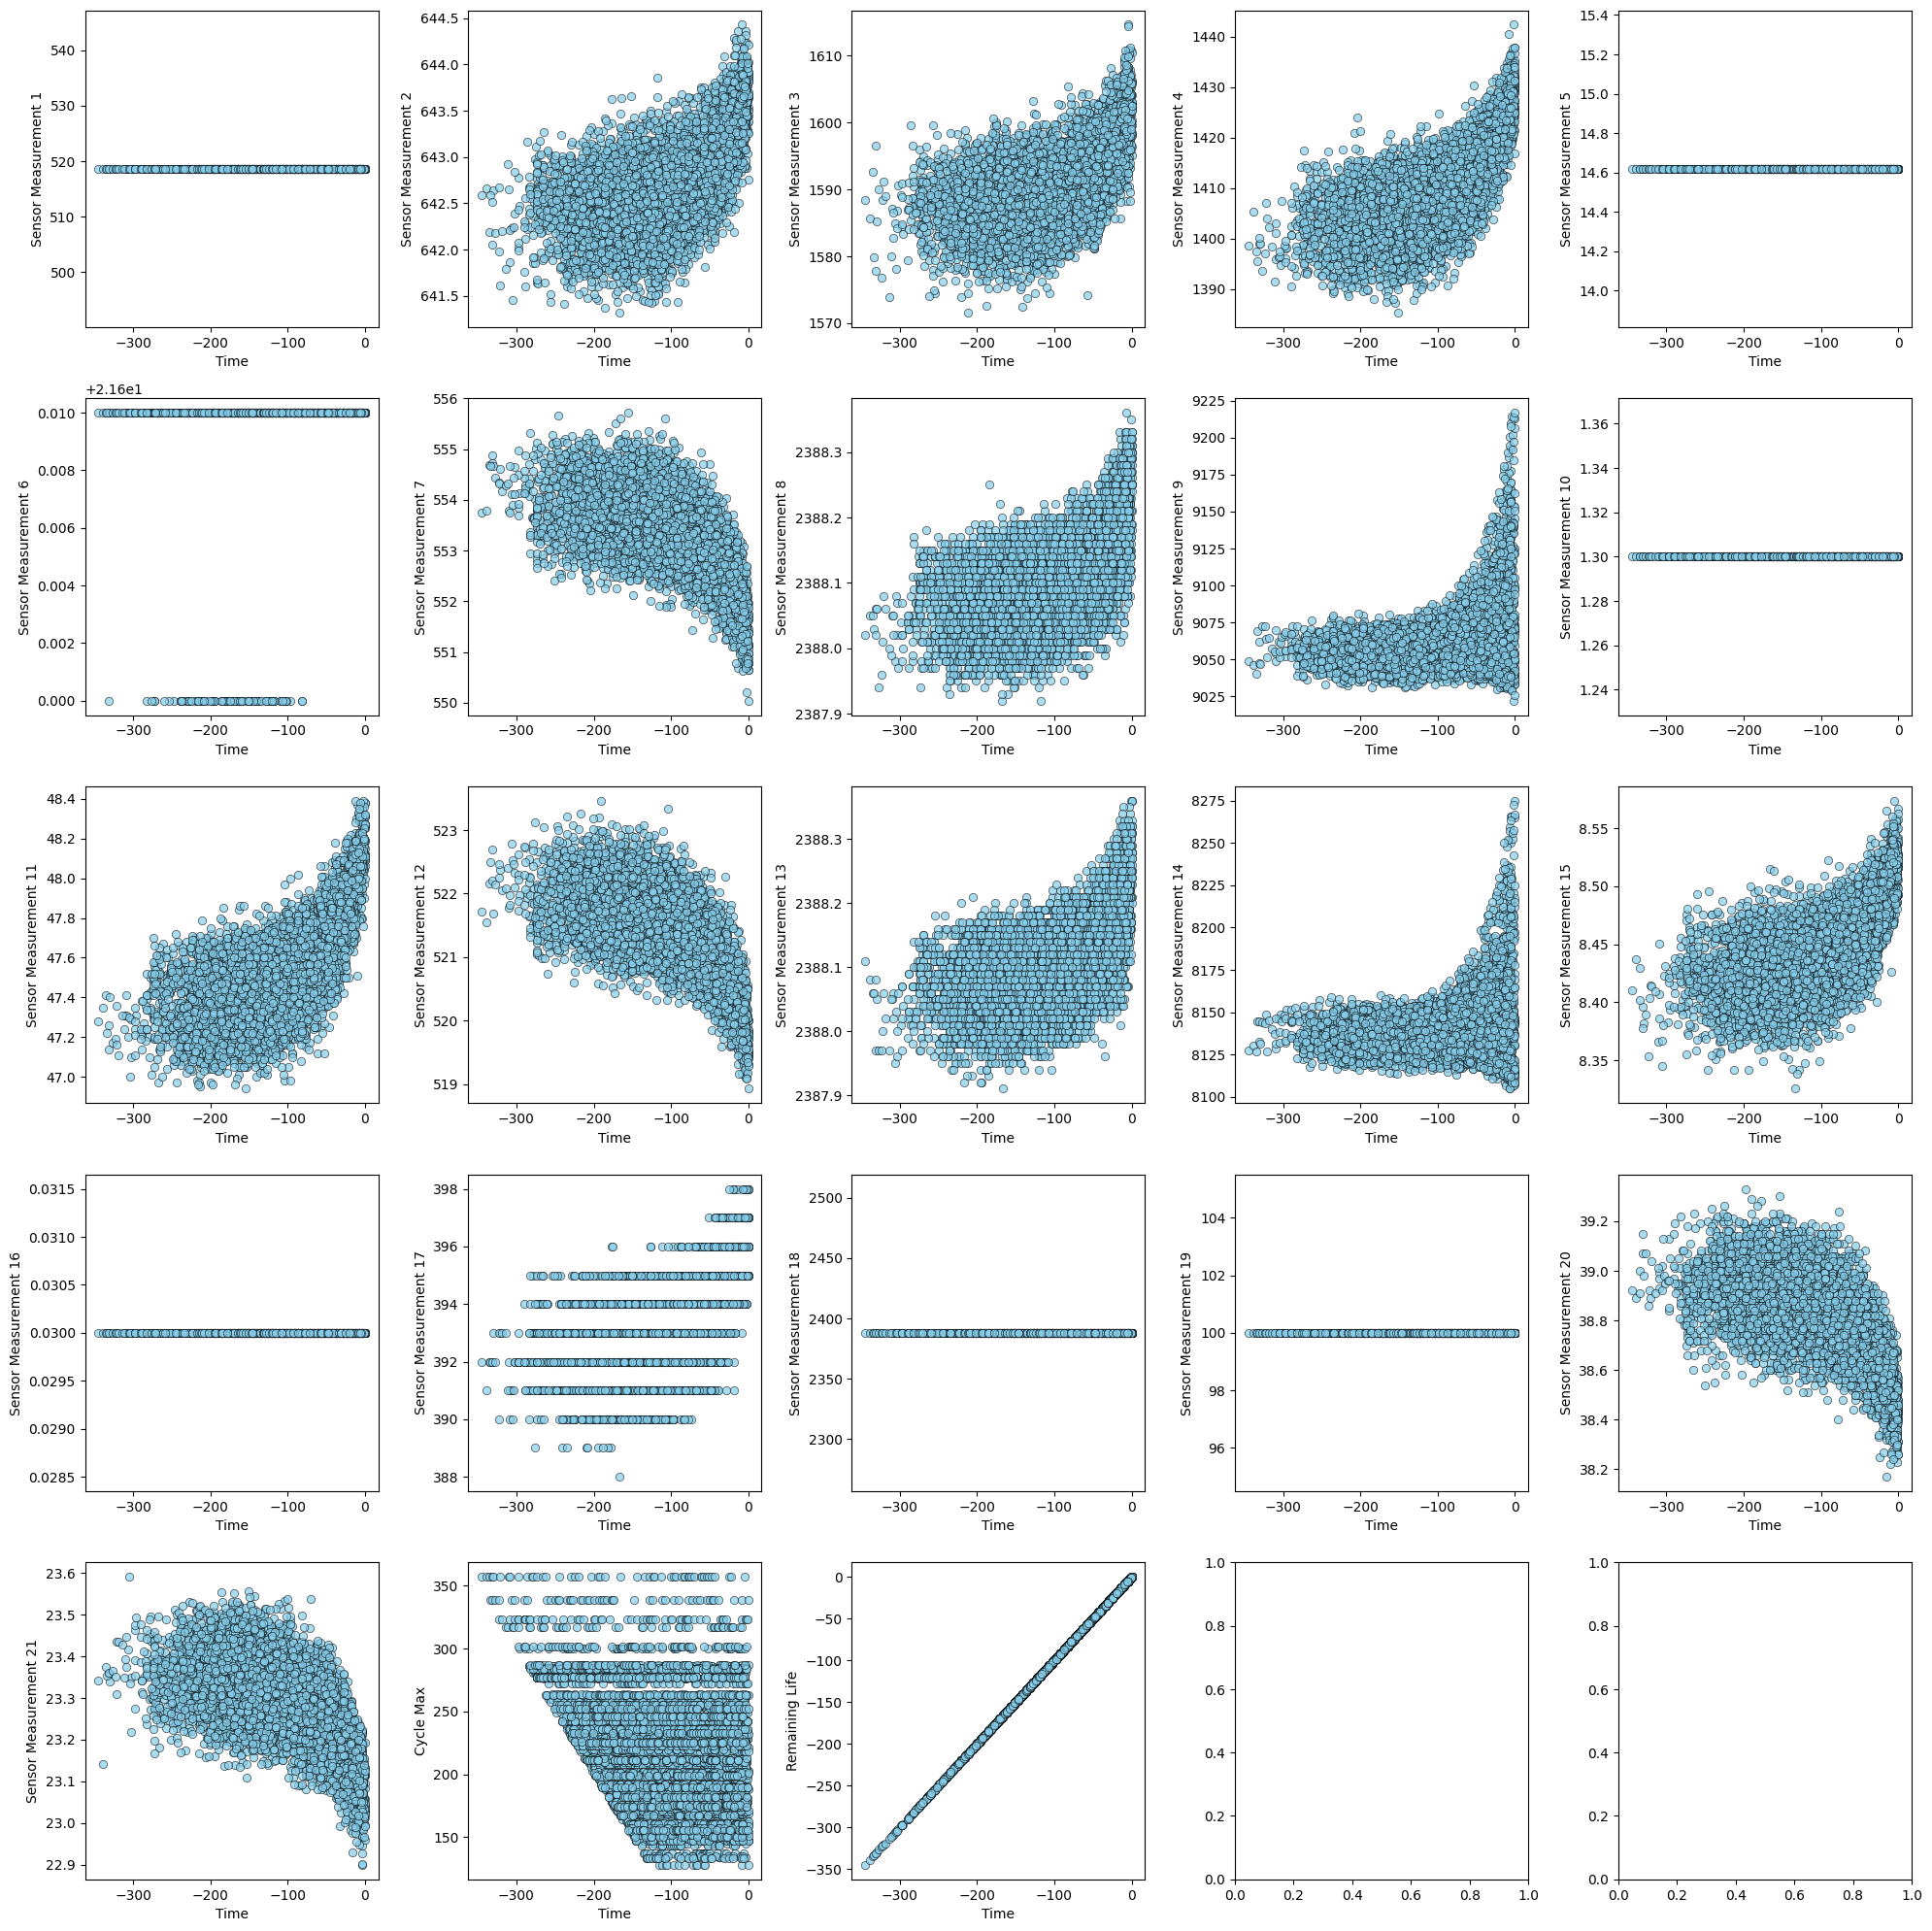

In [226]:
# Plot Remaining Life vs Sensor Measurement of all units and cluster 0

fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(20, 20)) 

for i in range(len(train.columns)-5):
    # Scatter plot on the ith subplot on cluster 0
    axs[i//5, i-(i//5)*5].scatter(train[train['cluster'] == 0]['Remaining Life'], train[train['cluster'] == 0][train.columns[i+4]], 
                   color='skyblue', alpha=0.7, edgecolors='black', linewidths=0.5)
    axs[i//5, i-(i//5)*5].set_xlabel('Time')
    axs[i//5, i-(i//5)*5].set_ylabel(train.columns[i+4])

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

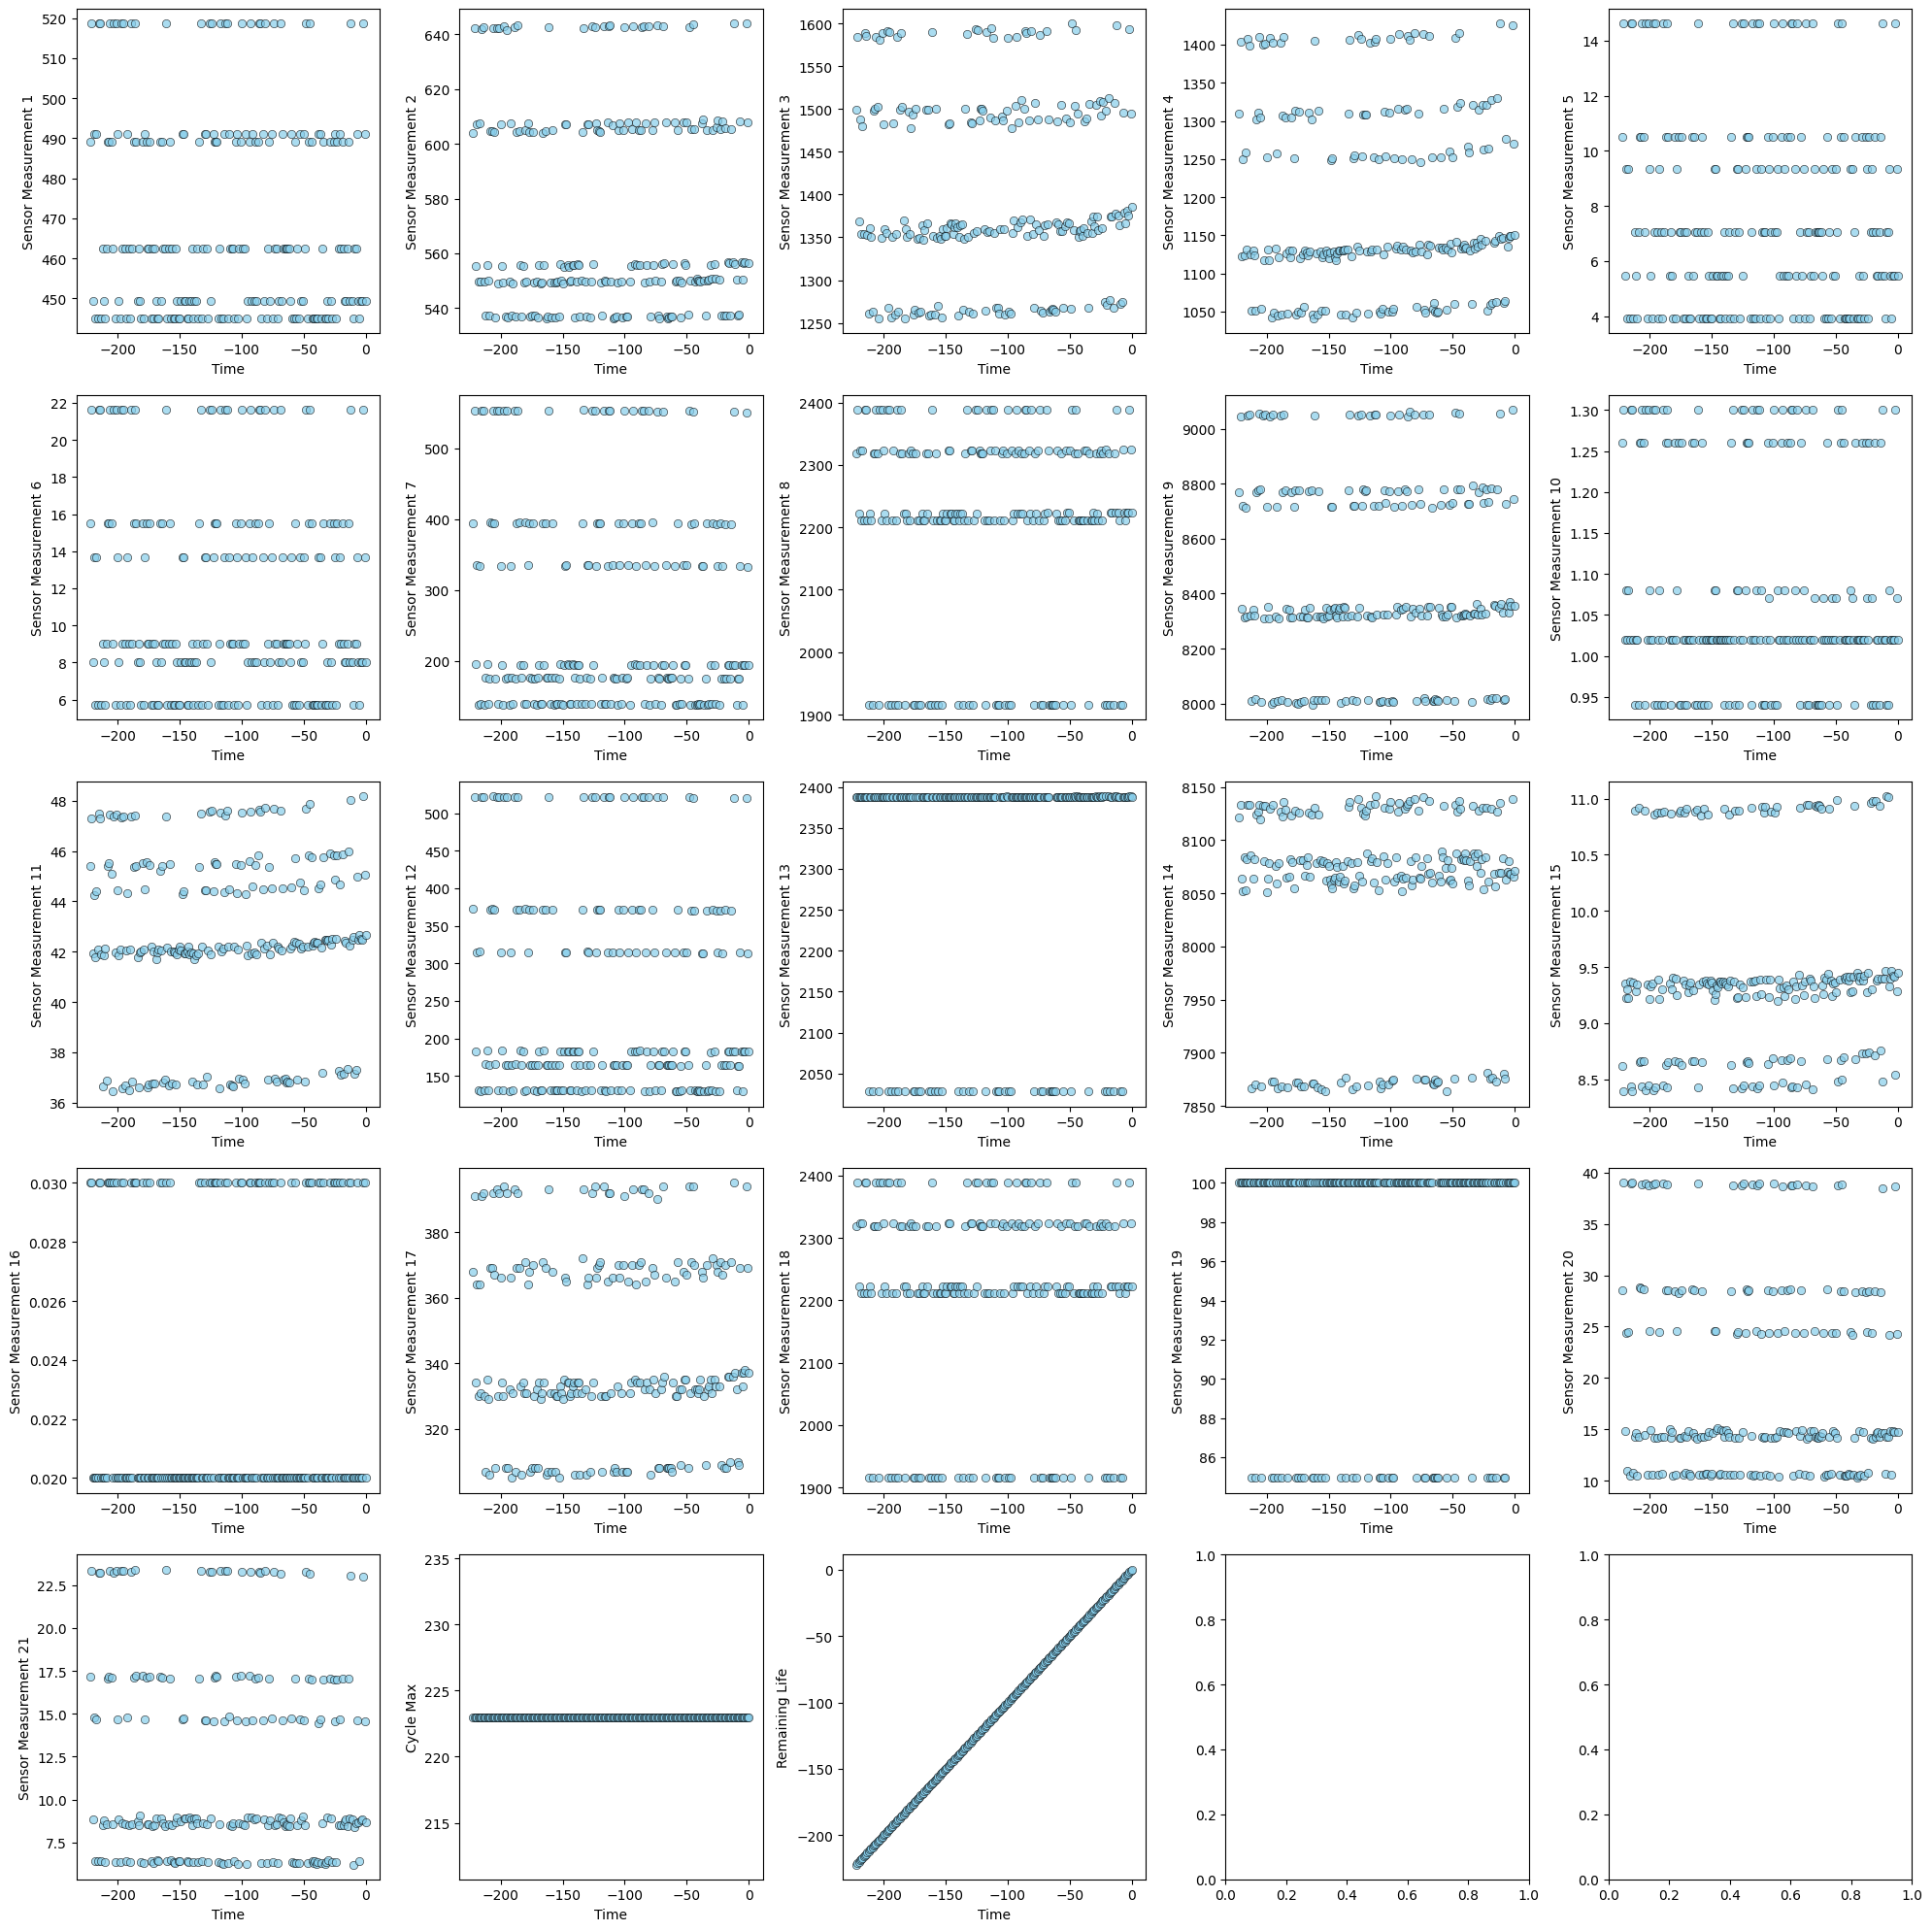

In [227]:
# Plot Remaining Life vs Sensor Measurement of Unit 1 and all clusters

fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(20, 20)) 

for i in range(len(train.columns)-5):
    # Scatter plot on the ith subplot on cluster 0
    axs[i//5, i-(i//5)*5].scatter(train.loc[1]['Remaining Life'], train.loc[1][train.columns[i+4]], 
                   color='skyblue', alpha=0.7, edgecolors='black', linewidths=0.5)
    axs[i//5, i-(i//5)*5].set_xlabel('Time')
    axs[i//5, i-(i//5)*5].set_ylabel(train.columns[i+4])

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

## Data preprocessing

In [335]:
# Split data set into training and test sets
# Apply random seed to allow repetition of output
train_set, val_set = train_test_split (train, test_size=0.2, random_state=23)

In [336]:
# Apply Standard Scaler by cluster to transform the scaling of different features into similar scales.
unique_clusters = train_set['cluster'].unique().tolist()

cluster_mean= pd.DataFrame()
cluster_std= pd.DataFrame()

for i in range(len(unique_clusters)):
    cluster_mean['Cluster ' + str(i+1)] = train_set[train_set['cluster'] == i].mean()
    cluster_std['Cluster ' + str(i+1)] = train_set[train_set['cluster'] == i].std()

cluster_mean = cluster_mean.transpose()
cluster_std = cluster_std.transpose()


In [337]:
# Get normalized sensor measurement - training set
train_scaled_temp= pd.DataFrame()
train_scaled= pd.DataFrame()

for i in range(len(unique_clusters)):
    train_scaled_temp = (train_set[train_set['cluster'] == i] - cluster_mean.loc['Cluster ' + str(i+1)]) / cluster_std.loc['Cluster ' + str(i+1)]
    train_scaled_temp['Time, in cycles Reference'] = train_set[train_set['cluster'] == i]['Time, in cycles']
    train_scaled_temp['Remaining Life Reference'] = train_set[train_set['cluster'] == i]['Remaining Life']
    train_scaled_temp['Cluster Reference'] = train_set[train_set['cluster'] == i]['cluster']
    train_scaled = pd.concat([train_scaled, train_scaled_temp], axis=0)
train_scaled = train_scaled.drop(["Time, in cycles", "Operational Setting 1", "Operational Setting 2", "Operational Setting 3", 
                                  "cluster", "Cycle Max", "Remaining Life"], axis=1)
train_scaled = train_scaled.fillna(0)
train_scaled.rename(columns={'Remaining Life Reference': 'Remaining Life', 'Time, in cycles Reference': 'Time, in cycles', 
                             'Cluster Reference': 'Cluster'}, inplace=True)
train_scaled = train_scaled.sort_values(by='Time, in cycles')
train_scaled

Sensor Measurement 1  Sensor Measurement 2  Sensor Measurement 3  \
Unit Number                                                                     
155                     -0.999909             -1.114765             -0.618672   
101                      0.000000              0.355041             -0.090011   
172                      0.999908             -1.379270             -2.181128   
131                      0.000000             -0.202732             -2.828037   
106                      0.000000              0.357935             -0.087494   
...                           ...                   ...                   ...   
5                        0.000000              1.448262              1.408972   
5                        0.000000              2.648110              1.280700   
5                        0.000000              2.470443              1.335203   
5                        0.999907              1.349465              1.757326   
5                       -0.999909              1.510668              1.332805   

             Sensor Measurement 4  Sensor Measurement 5  Sensor Measurement 6  \
Unit Number                                                                     
155                     -0.952734              0.999909             -0.706275   
101                     -0.987791             -0.999911              0.112539   
172                     -0.779002             -0.999908             -0.172709   
131                     -1.440901             -0.999911              0.112539   
106                     -1.095263              0.999946              0.850396   
...                           ...                   ...                   ...   
5                        3.577679              0.999946              0.850396   
5                        2.052392             -0.999911              0.112539   
5                        2.057087              0.999946              0.850396   
5                        1.218327              0.000000              0.673902   
5                        1.767522              0.999909              1.415623   

             Sensor Measurement 7  Sensor Measurement 8  Sensor Measurement 9  \
Unit Number                                                                     
155                      0.907436             -1.299316              0.061517   
101                      0.668420             -0.949329             -0.330900   
172                     -0.787307             -0.454483             -0.310054   
131                      1.391319             -1.972640              0.156902   
106                     -0.107674             -1.215773             -1.233854   
...                           ...                   ...                   ...   
5                       -0.830847              2.211105              2.688977   
5                       -1.791769              1.389667              2.354553   
5                        0.005321              2.079302              2.739637   
5                       -1.263373              3.347458              2.537856   
5                       -2.491739              2.002567              2.911213   

             Sensor Measurement 10  ...  Sensor Measurement 15  \
Unit Number                         ...                          
155                       0.000000  ...              -0.924615   
101                      -0.999911  ...              -0.750567   
172                      -0.171580  ...              -0.548498   
131                      -0.999911  ...              -0.469948   
106                      -0.150797  ...              -0.217604   
...                            ...  ...                    ...   
5                         6.630708  ...              -0.160812   
5                        -0.999911  ...               1.923562   
5                        -0.150797  ...               2.029732   
5                        -1.818893  ...               1.861901   
5                         0.000000  ...               2.256

In [338]:
# Get normalized sensor measurement - validation set


Sensor Measurement 1  Sensor Measurement 2  Sensor Measurement 3  \
Unit Number                                                                     
194                      0.000000             -0.347340              0.195341   
123                      0.000000             -2.351194             -0.895113   
18                       0.000000              0.706232              1.487920   
76                       0.000000              0.417016              1.289193   
88                       0.000000              0.602940              1.265413   
...                           ...                   ...                   ...   
16                       0.999907             -0.885641              0.320057   
39                       0.999907              0.157408              0.915572   
208                      0.999907              1.094024             -0.338328   
104                      0.999907              1.541045              1.587927   
87                       0.999907              0.540569             -0.030965   

             Sensor Measurement 4  Sensor Measurement 5  Sensor Measurement 6  \
Unit Number                                                                     
194                      0.789177             -0.999911              0.112539   
123                     -0.628507             -0.999911              0.112539   
18                       0.999713             -0.999911              0.112539   
76                      -1.454631             -0.999911              0.112539   
88                       1.396756             -0.999911              0.112539   
...                           ...                   ...                   ...   
16                      -0.028215              0.000000              0.673902   
39                       1.190084              0.000000              0.673902   
208                      0.766439              0.000000              0.673902   
104                      2.106696              0.000000              0.673902   
87                       0.959005              0.000000              0.673902   

             Sensor Measurement 7  Sensor Measurement 8  Sensor Measurement 9  \
Unit Number                                                                     
194                     -0.077798              0.658731             -0.160169   
123                     -0.089458             -0.803142             -0.562098   
18                      -1.337042              1.535855             -0.720633   
76                       0.446886             -0.218393              0.122858   
88                      -0.462567              1.682042             -1.290244   
...                           ...                   ...                   ...   
16                      -0.863849             -0.089400             -0.568321   
39                      -1.263373              1.550919              1.097771   
208                     -0.447678             -0.479952             -0.998756   
104                     -0.897143              3.972341              3.736034   
87                      -0.231270              0.301152             -0.410456   

             Sensor Measurement 10  ...  Sensor Measurement 14  \
Unit Number                         ...                          
194                      -0.999911  ...               0.083915   
123                      -0.999911  ...              -0.150629   
18                       -0.999911  ...              -1.193639   
76                       -0.999911  ...               0.171573   
88                       -0.999911  ...              -1.347040   
...                            ...  ...                    ...   
16                        0.549682  ...              -0.591413   
39                       -1.818893  ...               0.781422   
208                       0.549682  ...              -0.594643   
104                      -1.818893  ...               3.926344   
87                       -1.818893  ...              -0.934

In [339]:
# Convert training and test dataset into x and y

xtrain = train_scaled.drop(["Remaining Life"], axis=1)
ytrain = train_scaled["Remaining Life"]

xtest = val_scaled.drop(["Remaining Life"], axis=1)
ytest = val_scaled["Remaining Life"]

# Construct Asset Health Indicator

In [340]:
xtrain

Sensor Measurement 1  Sensor Measurement 2  Sensor Measurement 3  \
Unit Number                                                                     
155                     -0.999909             -1.114765             -0.618672   
101                      0.000000              0.355041             -0.090011   
172                      0.999908             -1.379270             -2.181128   
131                      0.000000             -0.202732             -2.828037   
106                      0.000000              0.357935             -0.087494   
...                           ...                   ...                   ...   
5                        0.000000              1.448262              1.408972   
5                        0.000000              2.648110              1.280700   
5                        0.000000              2.470443              1.335203   
5                        0.999907              1.349465              1.757326   
5                       -0.999909              1.510668              1.332805   

             Sensor Measurement 4  Sensor Measurement 5  Sensor Measurement 6  \
Unit Number                                                                     
155                     -0.952734              0.999909             -0.706275   
101                     -0.987791             -0.999911              0.112539   
172                     -0.779002             -0.999908             -0.172709   
131                     -1.440901             -0.999911              0.112539   
106                     -1.095263              0.999946              0.850396   
...                           ...                   ...                   ...   
5                        3.577679              0.999946              0.850396   
5                        2.052392             -0.999911              0.112539   
5                        2.057087              0.999946              0.850396   
5                        1.218327              0.000000              0.673902   
5                        1.767522              0.999909              1.415623   

             Sensor Measurement 7  Sensor Measurement 8  Sensor Measurement 9  \
Unit Number                                                                     
155                      0.907436             -1.299316              0.061517   
101                      0.668420             -0.949329             -0.330900   
172                     -0.787307             -0.454483             -0.310054   
131                      1.391319             -1.972640              0.156902   
106                     -0.107674             -1.215773             -1.233854   
...                           ...                   ...                   ...   
5                       -0.830847              2.211105              2.688977   
5                       -1.791769              1.389667              2.354553   
5                        0.005321              2.079302              2.739637   
5                       -1.263373              3.347458              2.537856   
5                       -2.491739              2.002567              2.911213   

             Sensor Measurement 10  ...  Sensor Measurement 14  \
Unit Number                         ...                          
155                       0.000000  ...              -0.023386   
101                      -0.999911  ...              -0.383396   
172                      -0.171580  ...              -0.244412   
131                      -0.999911  ...               0.733649   
106                      -0.150797  ...              -1.193420   
...                            ...  ...                    ...   
5                         6.630708  ...               2.147193   
5                        -0.999911  ...               2.482068   
5                        -0.150797  ...               2.656626   
5                        -1.818893  ...               2.574183   
5                         0.000000  ...               2.497

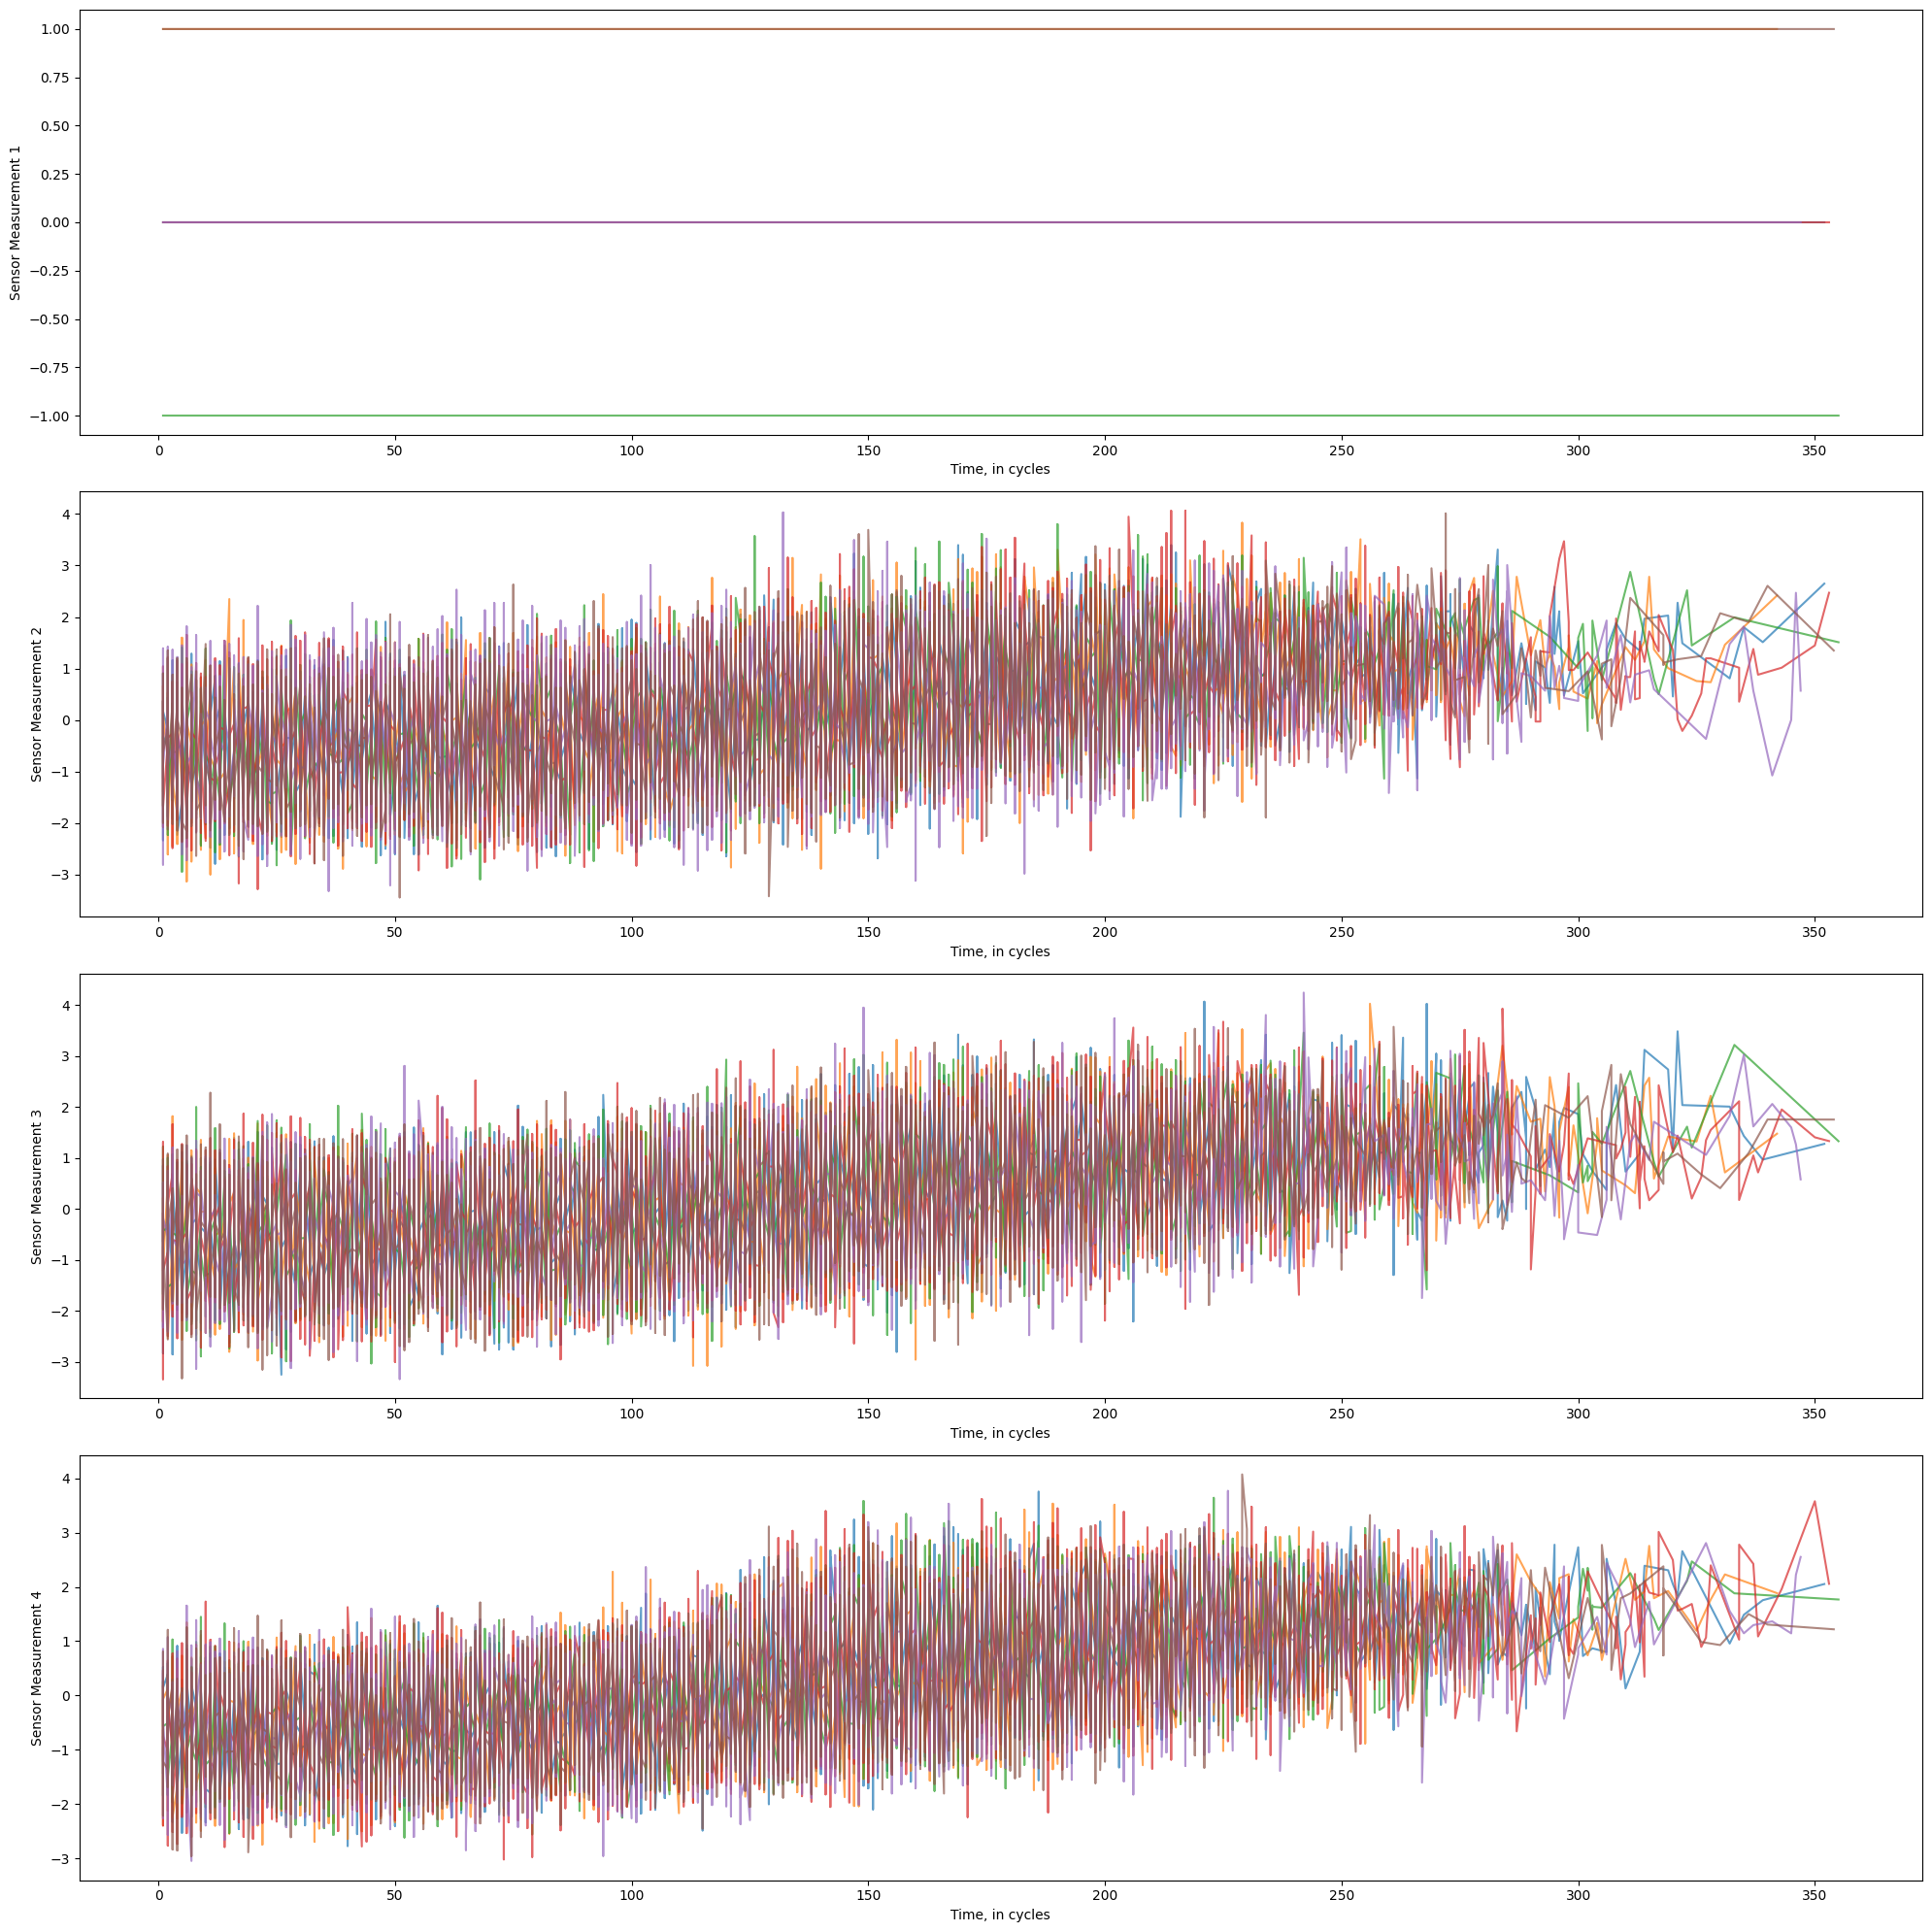

In [341]:
# Plot Remaining Life vs Normalised Sensor Measurement of all units

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(20, 20)) 
cmap = plt.get_cmap('tab10')  # 'tab10' has 10 distinct colors
colors = [cmap(i) for i in range(6)]  # get first 6 colors

# for i in range(len(train_scaled.columns)-1):
for i in range(4):
    # Scatter plot on the ith subplot on cluster 0
    for j in range(len(unique_clusters)):
        axs[i].plot(xtrain[xtrain['Cluster']==j]['Time, in cycles'], xtrain[xtrain['Cluster']==j][xtrain.columns[i]], 
                       color=colors[j], alpha=0.7)
        # axs[i].scatter(ytrain[xtrain['Cluster']==j], xtrain[xtrain['Cluster']==j][xtrain.columns[i]], 
        #        color=colors[j], alpha=0.7, edgecolors='black', linewidths=0.5)
        axs[i].set_xlabel('Time, in cycles')
        axs[i].set_ylabel(train_scaled.columns[i])

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

In [342]:
xtrain = train_scaled.drop(["Remaining Life", "Time, in cycles", "Cluster"], axis=1)


In [343]:
# Linear Regression Basic Implementation 
model = LinearRegression()
model.fit(x_sensor, ytrain)

# # Predict on test set
# y_pred = model.predict(xtest)

LinearRegression()

In [356]:
# Linear Regression Basic Implementation 
model = LinearRegression()
slope = []

for column in xtrain.columns:
    x_sensor = xtrain[[column]]
    model.fit(x_sensor, ytrain)
    slope.append((model.coef_[0], column))
    print(column, model.coef_[0])
slope = sorted(slope, reverse=True)[:5]
selected_sensors = [i[1] for i in slope]
selected_sensors
# # Predict on test set
# y_pred = model.predict(xtest)

Sensor Measurement 1 0.9421317427952297
Sensor Measurement 2 38.424390923490236
Sensor Measurement 3 38.05253518206037
Sensor Measurement 4 45.20707329238423
Sensor Measurement 5 -0.5661534479935255
Sensor Measurement 6 23.260014651089154
Sensor Measurement 7 -30.684214485350594
Sensor Measurement 8 28.996656826176917
Sensor Measurement 9 26.521454679472942
Sensor Measurement 10 -2.733932991125512
Sensor Measurement 11 47.25565645903
Sensor Measurement 12 -32.55270184835519
Sensor Measurement 13 29.19681073121241
Sensor Measurement 14 20.408717602562877
Sensor Measurement 15 44.085459775005745
Sensor Measurement 16 7.796386350132605
Sensor Measurement 17 39.72898475389761
Sensor Measurement 18 0.0
Sensor Measurement 19 0.0
Sensor Measurement 20 -29.060267934645566
Sensor Measurement 21 -29.54910432601816


['Sensor Measurement 11',
 'Sensor Measurement 4',
 'Sensor Measurement 15',
 'Sensor Measurement 17',
 'Sensor Measurement 2']

In [357]:
# # Plot Remaining Life vs Normalised Sensor Measurement of all units

# fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(20, 20)) 
# cmap = plt.get_cmap('tab10')  # 'tab10' has 10 distinct colors
# colors = [cmap(i) for i in range(6)]  # get first 6 colors

# # for i in range(len(train_scaled.columns)-1):
# for i in range(4):
#     # Scatter plot on the ith subplot on cluster 0
#     for j in range(len(unique_clusters)):
#         axs[i].plot(xtrain[xtrain['Cluster']==j]['Time, in cycles'], xtrain[xtrain['Cluster']==j][xtrain.columns[i]], 
#                        color=colors[j], alpha=0.7)
#         # axs[i].scatter(ytrain[xtrain['Cluster']==j], xtrain[xtrain['Cluster']==j][xtrain.columns[i]], 
#         #        color=colors[j], alpha=0.7, edgecolors='black', linewidths=0.5)
#         axs[i].set_xlabel('Time, in cycles')
#         axs[i].set_ylabel(train_scaled.columns[i])

# # Adjust layout to prevent overlapping titles/labels
# plt.tight_layout()

In [359]:
# Linear Regression Basic Implementation 
x_sensor = xtrain[selected_sensors]
model = LinearRegression()
model.fit(x_sensor, ytrain)
y_pred = model.predict(x_sensor)
xtrain = train_scaled.drop(["Remaining Life", "Time, in cycles", "Cluster"], axis=1)

x_sensor.loc[:, "Time, in cycles"] = train_scaled["Time, in cycles"]

In [349]:
# Evaluate the model
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("Slope:", model.coef_)
# print("R² score:", r2_score(y_test, y_pred))
# print("RMSE:", mean_squared_error(y_test, y_pred))

Intercept: -109.0854521696527
Coefficients: [17.75323602 13.51993142 11.16834032  8.85482948  7.22207628]
Slope: [17.75323602 13.51993142 11.16834032  8.85482948  7.22207628]


In [352]:
ytrain.shape

(36734,)

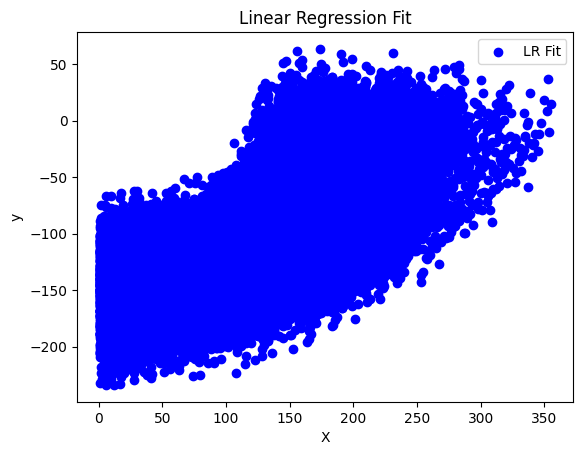

In [360]:
# Plot

plt.scatter(x_sensor["Time, in cycles"], y_pred, color='blue', label='LR Fit')       # actual data points
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

In [294]:
# Calculate variance for each sensor
variances = xtrain.var()
threshold = 0.95
trendable_features = variances[variances > threshold].index
trendable_features

Index(['Sensor Measurement 2', 'Sensor Measurement 3', 'Sensor Measurement 4',
       'Sensor Measurement 6', 'Sensor Measurement 7', 'Sensor Measurement 8',
       'Sensor Measurement 9', 'Sensor Measurement 11',
       'Sensor Measurement 12', 'Sensor Measurement 13',
       'Sensor Measurement 14', 'Sensor Measurement 15',
       'Sensor Measurement 17', 'Sensor Measurement 20',
       'Sensor Measurement 21'],
      dtype='object')

In [297]:
health_ind = xtrain[trendable_features]
health_ind

Sensor Measurement 2  Sensor Measurement 3  Sensor Measurement 4  \
Unit Number                                                                     
155                     -1.115765             -0.622480             -0.950904   
101                      0.370647             -0.087271             -0.972046   
172                     -1.375820             -2.184427             -0.780401   
131                     -0.187854             -2.822366             -1.425401   
106                      0.363472             -0.084139             -1.091150   
...                           ...                   ...                   ...   
5                        1.456706              1.419945              3.583286   
5                        2.666707              1.281973              2.069781   
5                        2.481612              1.345800              2.062208   
5                        1.350048              1.750281              1.212344   
5                        1.527824              1.332050              1.786619   

             Sensor Measurement 6  Sensor Measurement 7  Sensor Measurement 8  \
Unit Number                                                                     
155                     -0.699440              0.900742             -1.300857   
101                      0.117050              0.657744             -0.939880   
172                     -0.173738             -0.791811             -0.455567   
131                      0.117050              1.382562             -1.966457   
106                      0.852464             -0.110930             -1.229023   
...                           ...                   ...                   ...   
5                        0.852464             -0.833805              2.217004   
5                        0.117050             -1.808976              1.406582   
5                        0.852464              0.002019              2.084464   
5                        0.674632             -1.258860              3.327517   
5                        1.429507             -2.505714              2.017459   

             Sensor Measurement 9  Sensor Measurement 11  \
Unit Number                                                
155                      0.066969              -0.301548   
101                     -0.327655              -0.527113   
172                     -0.310805              -1.336825   
131                      0.160650              -2.162440   
106                     -1.243726              -0.016759   
...                           ...                    ...   
5                        2.696314               2.969908   
5                        2.360566               2.198432   
5                        2.747196               2.671242   
5                        2.511703               2.049739   
5                        2.942261               2.141623   

             Sensor Measurement 12  Sensor Measurement 13  \
Unit Number                                                 
155                       0.917574              -0.885043   
101                       0.229067               0.071170   
172                       0.061291              -0.380119   
131                       0.975872              -1.091965   
106                       0.603589              -1.258484   
...                            ...                    ...   
5                        -1.672522               2.242650   
5                        -1.292724               1.525087   
5                        -0.563647               2.211938   
5                        -1.284674               2.930181   
5                        -1.351099               2.158973   

             Sensor Measurement 14  Sensor Measurement 15  \
Unit Number                                                 
155                      -0.019430              -0.923833   
101                      -0.382498              -0.730911   
172                      -0.242872              -0.548247   
131                      